# <center><font style="color:rgb(100,109,254)"> Replacing ROIs & Transparent Images</font></center>
We have already changed ROI of 1 part of Image with another part, similary we can replace ROI of 1 image with another image.
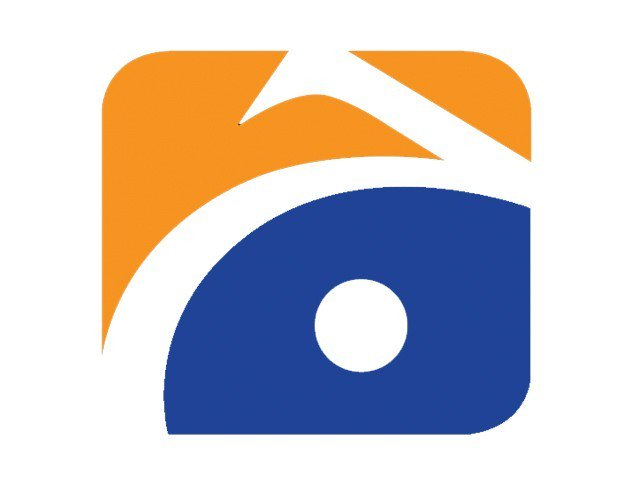

In [1]:
import cv2
import matplotlib.pyplot as plt
img_logo=cv2.imread('media/M2/geo.jpg',1)
img_main=cv2.imread('media/M2/joker1.png',1)
original_copy = img_main.copy()
resized_logo = cv2.resize(img_logo, (0,0), fx=0.2, fy=0.2)

rows,cols,channels = resized_logo.shape   # dimensions of resized_logo

# putting logo on top-left corner
original_copy[0:rows, 0:cols ] = resized_logo

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img_main[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(original_copy[:,:,::-1]);plt.title("Modified Image"); 

##  <font style="color:rgb(134,19,348)">Now putting the logo in the bottom right corner </font>

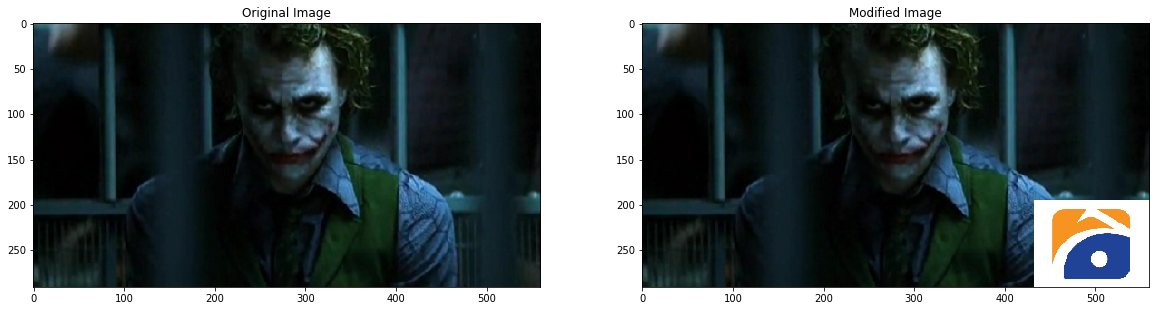

In [2]:
original_copy = img_main.copy()
rows2,cols2,_= img_main.shape  # dimensions of main_image

original_copy[rows2-rows:rows2, cols2-cols:cols2 ] = resized_logo

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img_main[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(original_copy[:,:,::-1]);plt.title("Modified Image"); 

###  <font style="color:rgb(34,169,134)"> Task 9: Put this logo on top right of the Image by using rows,row2,cols,cols2, Don't use custom values.</font>

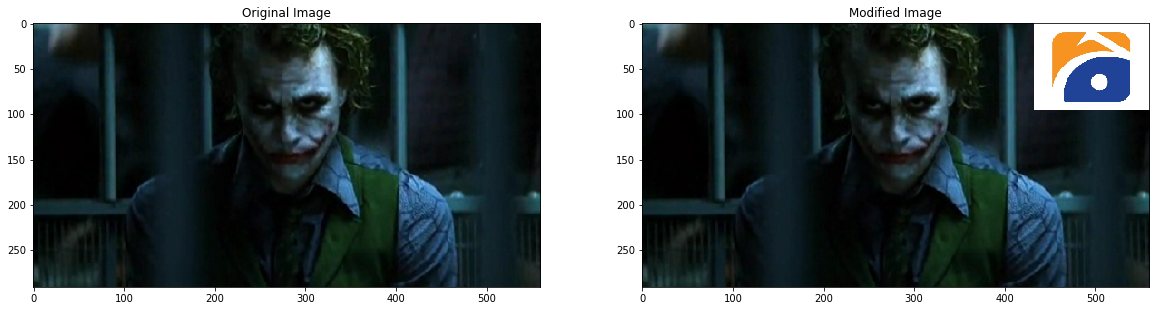

In [3]:
original_copy = img_main.copy()
rows2,cols2,_= img_main.shape  # dimensions of main_image
#ADD CODE BELOW
original_copy[0:rows, cols2-cols:cols2 ] = resized_logo
                                        ## ~ 1 line of code
    
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img_main[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(original_copy[:,:,::-1]);plt.title("Modified Image"); 

##  <font style="color:rgb(134,19,348)">Working with Transparent Images. </font>

As you Know a normal bgr image has 3 channels, but transparent images have 4 channels, the 4th channel is the alpha channel, the alpha channel stores information regarding transparency, in simple terms this alpha channel is just a binary black and white mask where the white area represents the foreground and the black area represents the background. <br>

<i> To use the alpha channel you have to pass in -1 instead of 1 in the imread function. </i>
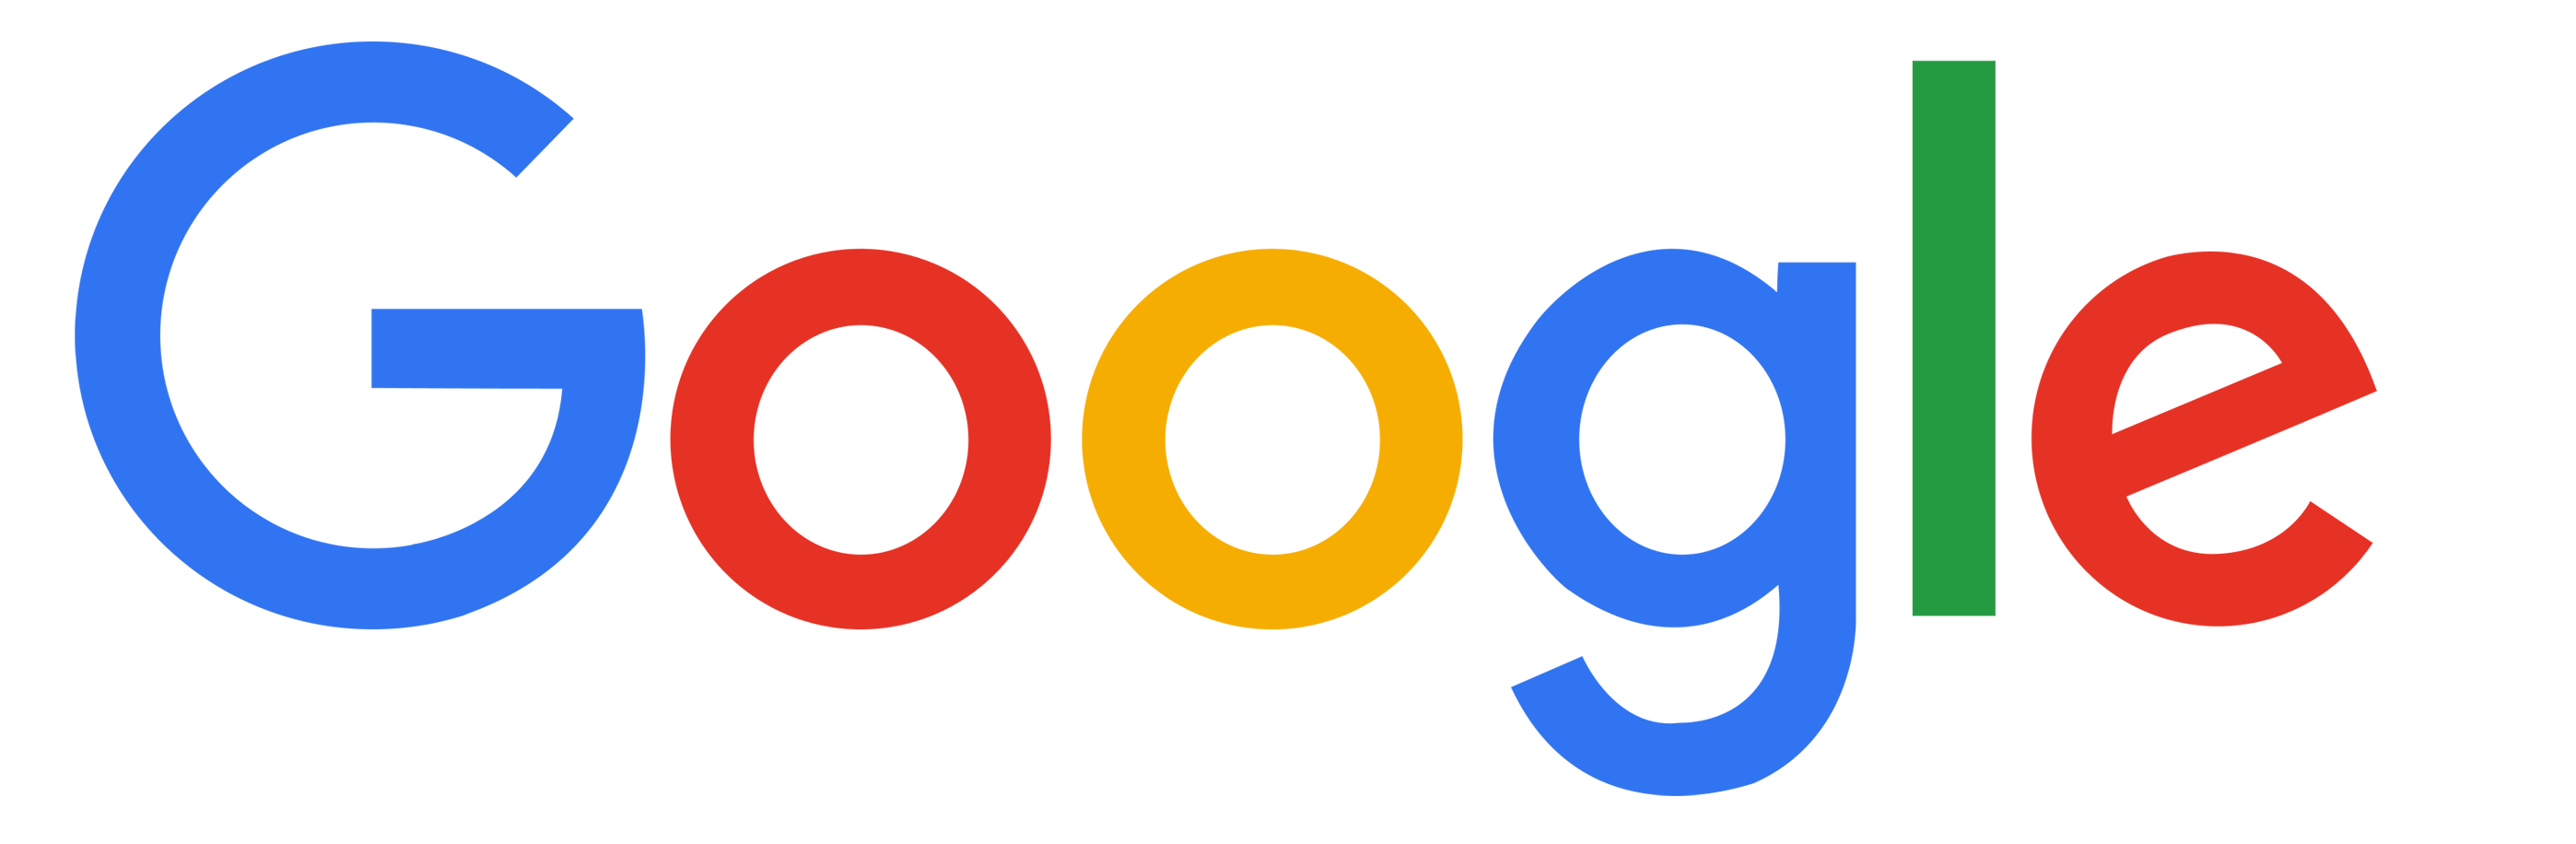

> **Lets Split the above image in 2 parts**

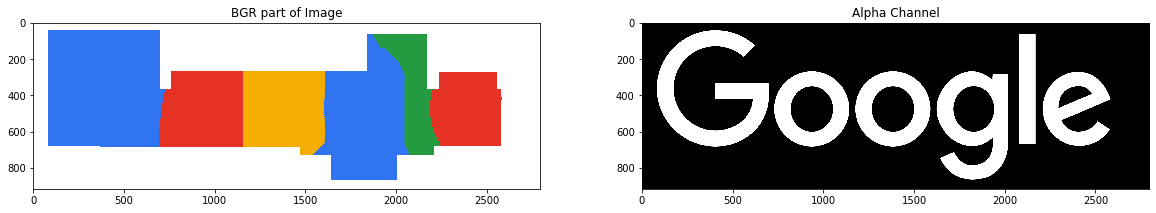

In [5]:
image = cv2.imread('media/M2/glogo.png',-1)
Alpha_channel = image[...,-1]
bgr_part = image[...,0:3]

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(bgr_part[:,:,::-1]);plt.title("BGR part of Image");
plt.subplot(122);plt.imshow(Alpha_channel,cmap='gray');plt.title("Alpha Channel"); 

###  <font style="color:rgb(134,19,348)">Overlaying Transparent Images (without alpha channel) and Images with Black background </font>

Now we are gonna try a couple of image additions to overlay a transparent image and a normal image with black background on top of a normal bgr image.<br>
**Note:** We are using the transparent image without the alpha channel and so it acts as a normal bgr image.

(289, 463, 3) (289, 463, 3) (289, 463, 3)


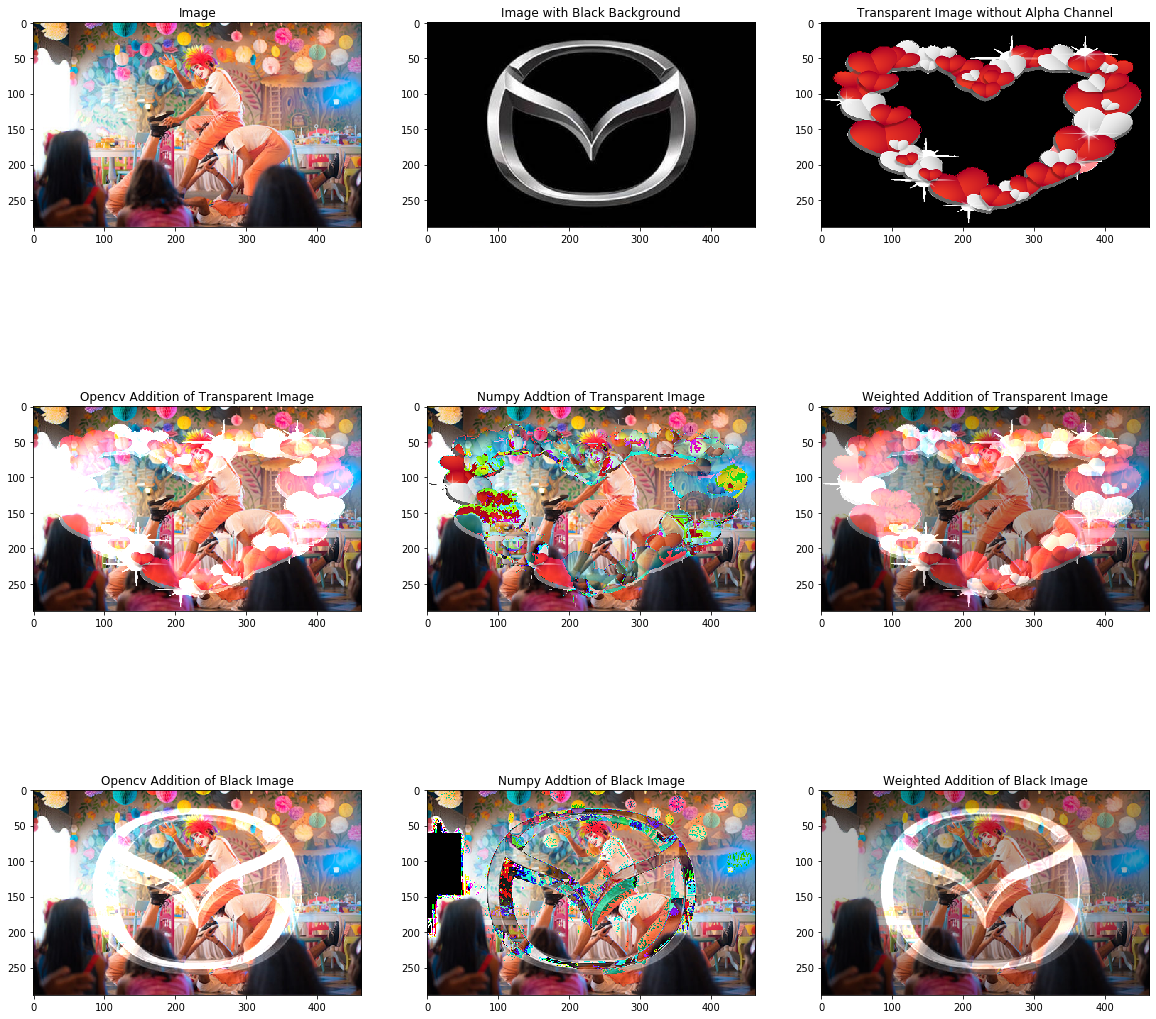

In [6]:
import cv2
image = cv2.imread('media/M2/party.jpg',1)
car_img_black = cv2.imread('media/M2/carlogo.jpg',1)  # image with blackground
heart_pic = cv2.imread('media/M2/heart.png',1)      # image with transparent background without alpha channel


# Make sure all three images have the same shape
resized_image = cv2.resize(image, (463, 289)) 
resized_heart = cv2.resize(heart_pic, (463, 289)) 

print(resized_image.shape,resized_heart.shape,car_img_black.shape)


#Opencv Addition
total_black = cv2.add(resized_image,car_img_black) 
total_transparent = cv2.add(resized_image,resized_heart)

#Numpy addition of images gives different results
total_numpy_black = resized_image + car_img_black
total_numpy_transparent = resized_image + resized_heart 

weighted_black = cv2.addWeighted(resized_image,0.7,car_img_black,0.7,0)
weighted_transparent = cv2.addWeighted(resized_image,0.7,resized_heart,0.7,0)

plt.figure(figsize=[20,20])
plt.subplot(331);plt.imshow(resized_image[:,:,::-1]);plt.title("Image");
plt.subplot(332);plt.imshow(car_img_black[:,:,::-1]);plt.title("Image with Black Background");
plt.subplot(333);plt.imshow(resized_heart[:,:,::-1]);plt.title("Transparent Image without Alpha Channel");
plt.subplot(334);plt.imshow(total_transparent[:,:,::-1]);plt.title("Opencv Addition of Transparent Image");
plt.subplot(335);plt.imshow(total_numpy_transparent[:,:,::-1]);plt.title("Numpy Addtion of Transparent Image");
plt.subplot(336);plt.imshow(weighted_transparent[:,:,::-1]);plt.title("Weighted Addition of Transparent Image");
plt.subplot(337);plt.imshow(total_black[:,:,::-1]);plt.title("Opencv Addition of Black Image");
plt.subplot(338);plt.imshow(total_numpy_black[:,:,::-1]);plt.title("Numpy Addtion of Black Image");
plt.subplot(339);plt.imshow(weighted_black[:,:,::-1]);plt.title("Weighted Addition of Black Image");

###  <font style="color:rgb(134,19,348)">Conclusions: </font>

So here you should try to Understand that in order to overlay an image on top of another image without the background some extra work has to be done in opencv <br>

Now in the above results take note of Opencv Addition , the parts where addition is performed is really bright, why is that ? , well its pretty obvious before we were just replacing roi with another roi but now we are plainly adding two images so if a pixel was 200 before and we add 100 to it then opencv rounds it of to 255 which is max intensity (White), That is why we do wighted addition to prevent creating such bright whitish images. <br>

Wait but happened in numpy addition, there are weird colors appearing, Why is that ? so the reason is that while opencv clips values above 0-255, numpy does the opposite it cycles and starts from zero again after reaching 255 so if you add 100 to 205 the result will be 49. also 255 + 1 = 0 